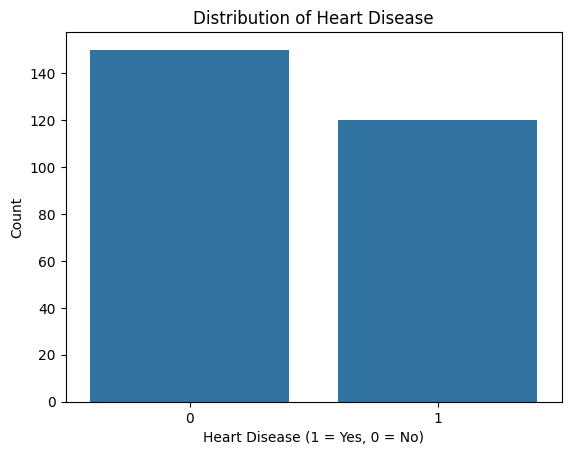

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Test_NV/heart_disease.csv')

# # Display the first few rows
# print(df.head())

# # Check for missing values
# print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='result', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Separate features and target
X = df.drop('result', axis=1)
y = df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy * 100:.2f}%")


[[17  4]
 [ 1 32]]
              precision    recall  f1-score   support

have disease       0.94      0.81      0.87        21
 not disease       0.89      0.97      0.93        33

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Accuracy: 90.74%


Top 5 Important Features:
                        Feature  Importance
9                       oldpeak    0.138002
2                         chest    0.133470
12                         thal    0.114730
7   maximum_heart_rate_achieved    0.105259
0                           age    0.095171


<ipython-input-14-d17cc828500c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


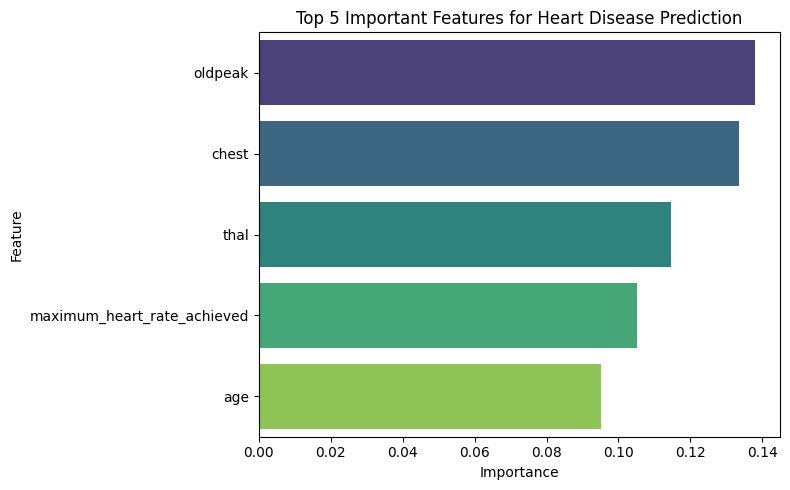

In [14]:
from sklearn.ensemble import RandomForestClassifier

# List of selected features
features = ['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
            'fasting_blood_sugar', 'resting_electrocardiographic_results',
            'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
            'slope', 'number_of_major_vessels', 'thal']

# Target
X = df[features]
y = df['result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Display top 5
print("Top 5 Important Features:")
print(top_features)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Load the full dataset
df = pd.read_csv('heart.csv')

# Selected features based on importance
features = ['oldpeak', 'chest', 'thal', 'maximum_heart_rate_achieved', 'age']

# Prepare features and target
X = df[features]
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Function to get user input and predict
def user_input_prediction():
    print("Enter the following details:")

    oldpeak = float(input("Oldpeak (ST depression induced by exercise): "))
    chest = int(input("Chest pain type (0-3): "))  # assuming 0-3 categorical encoding
    thal = int(input("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect): "))
    max_hr = int(input("Maximum heart rate achieved: "))
    age = int(input("Age: "))

    # Create DataFrame for prediction
    user_data = pd.DataFrame([[oldpeak, chest, thal, max_hr, age]], columns=features)

    # Predict
    prediction = gnb.predict(user_data)[0]
    proba = gnb.predict_proba(user_data)[0][prediction]

    if prediction == 1:
        print(f"\nPrediction: You **have** heart disease with probability {proba:.2f}")
    else:
        print(f"\nPrediction: You **do NOT have** heart disease with probability {proba:.2f}")

# Run prediction
user_input_prediction()


Please enter the following information:
Maximum heart rate achieved (e.g., 150): 110
ST depression induced by exercise relative to rest (oldpeak) (e.g., 1.0): 2.0
Chest pain type (0-3): 2
Number of major vessels colored by fluoroscopy (0-3): 2
Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect): 2

✅ Prediction: You **likely do NOT have** heart disease.
